# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [15]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


In [16]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 32
y_size = 128
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 40001
batch = 16

In [17]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32768)             3309568   
_________________________________________________________________
batch_normalization_4 (Batch (None, 32768)             131072    
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 32, 128)        0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 64, 64)        204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 64, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 16, 64, 64)       

In [18]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
# discriminator.trainable = True
discriminator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 16, 64, 64)        1664      
_________________________________________________________________
activation_7 (Activation)    (None, 16, 64, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 32, 128)        204928    
_________________________________________________________________
activation_8 (Activation)    (None, 8, 32, 128)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 32, 128)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)            

In [19]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(nosie_size,))                    # input
dis_output = discriminator(generator(ginput))   # output
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 32, 128, 1)        3647361   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 239361    
Total params: 3,886,722
Trainable params: 3,581,697
Non-trainable params: 305,025
_________________________________________________________________


In [20]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('E:\\nmb\\nmb_data\\npy\\2m5s\\project_total_npy\\total_f_data.npy')
print(X_train.shape)    # (2331, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2331, 128, 32)


28, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128,

(2331, 128, 32)

In [21]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2331, 128, 32)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.00016182661 -80.0

  scale = MaxAbsScaler()
    #   절대값이 0~1사이에 매핑
    #   -1 ~ 1 사이로 재조정
  X_train = scale.fit_transform(X_train)
  print(X_train.shape)   # (2331, 4096)
  print(np.max(X_train), np.min(X_train))   # -2.0228326e-06 -1.0


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 32, 128, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, true)        # 생성자 loss
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan13.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            idx2 = np.random.randint(0, gen_imgs.shape[0])
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 32, 128, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (862,128))
            # gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            # print(gen_mels.shape) # (862, 128)
            # gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'E:\\nmb\\gan_image\\dcgan13\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
            

gan_train(epochs, batch, 100)

end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

oss:5.2429
epoch:39532  d_loss:0.0588  g_loss:4.6478
epoch:39533  d_loss:0.6592  g_loss:4.7359
epoch:39534  d_loss:0.0285  g_loss:7.4481
epoch:39535  d_loss:0.3945  g_loss:6.2183
epoch:39536  d_loss:0.0753  g_loss:5.4605
epoch:39537  d_loss:0.2726  g_loss:4.8504
epoch:39538  d_loss:0.0829  g_loss:7.3954
epoch:39539  d_loss:0.2427  g_loss:6.6883
epoch:39540  d_loss:0.0674  g_loss:4.2877
epoch:39541  d_loss:0.1076  g_loss:3.2892
epoch:39542  d_loss:0.6967  g_loss:4.9311
epoch:39543  d_loss:0.2484  g_loss:9.6106
epoch:39544  d_loss:1.0661  g_loss:7.0715
epoch:39545  d_loss:0.4323  g_loss:4.4670
epoch:39546  d_loss:0.2192  g_loss:4.3883
epoch:39547  d_loss:0.3181  g_loss:6.9127
epoch:39548  d_loss:0.4326  g_loss:7.7486
epoch:39549  d_loss:0.3303  g_loss:7.1745
epoch:39550  d_loss:0.2215  g_loss:5.2232
epoch:39551  d_loss:0.4925  g_loss:4.0158
epoch:39552  d_loss:0.1786  g_loss:9.5448
epoch:39553  d_loss:0.3055  g_loss:8.7819
epoch:39554  d_loss:0.5752  g_loss:5.3626
epoch:39555  d_loss:0.5

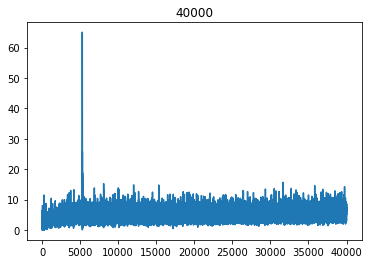

In [26]:
loss_csv = pd.read_csv('E:\\nmb\\gan_image\\csv\\loss_dcgan13.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

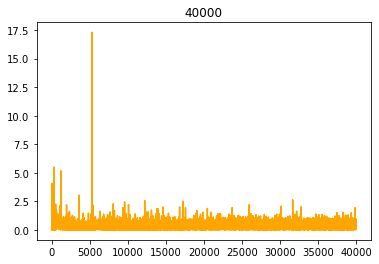

In [25]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()